In [ ]:
pip install ydata-profiling

In [ ]:
import seaborn as sns
df=sns.load_dataset('titanic')
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
# from ydata_profiling import ProfileReport

In [ ]:
print(df)

     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alo

In [ ]:
profile=ProfileReport(df)
profile.to_file("output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 15/15 [00:00<00:00, 24.91it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
abs_freq=df['class'].value_counts().sort_index()
rel_freq=(abs_freq/abs_freq.sum())*100
cum_freq=abs_freq.cumsum()
freq_table={
    'abs_freq':abs_freq,
    'rel_freq':rel_freq,
    'cum_freq':cum_freq
}
freq_table=pd.DataFrame(freq_table)
print(freq_table)

        abs_freq   rel_freq  cum_freq
class                                
First        216  24.242424       216
Second       184  20.650954       400
Third        491  55.106622       891


In [ ]:
table=pd.crosstab(df['sex'],df['survived'])
table.coulomns=['survived = 0','survived = 1']
print(table)

survived    0    1
sex               
female     81  233
male      468  109


/tmp/ipython-input-1472580412.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  table.coulomns=['survived = 0','survived = 1']


In [ ]:
total=table.values.sum()
joint_prob=table.loc['female',1]/total
print(joint_prob)

0.2615039281705948


In [ ]:
print(total)

891


In [ ]:
marg_prob=table.loc['female']/total
print(marg_prob.sum())

0.3524130190796857


In [ ]:
marg_prob=table[1].sum()/total
print(marg_prob)

0.3838383838383838


In [ ]:
cond_prob=table.loc['female',1]/table.loc['female'].sum()
print(cond_prob)

0.7420382165605095


In [ ]:
cond_prob=table.loc['female',1]/table[1].sum()
print(cond_prob)

0.6812865497076024


In [ ]:
table=pd.crosstab(df['sex'],df['survived'])
table.coulomns=['survived = 0','survived = 1']
print(table)

/tmp/ipython-input-1472580412.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  table.coulomns=['survived = 0','survived = 1']


survived    0    1
sex               
female     81  233
male      468  109


In [ ]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
df.nunique()

,0
survived,2
pclass,3
sex,2
age,88
sibsp,7
parch,7
fare,248
embarked,3
class,3
who,3


In [ ]:
df.drop('deck',axis=1,inplace=True)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     712 non-null    int64   
 1   pclass       712 non-null    int64   
 2   sex          712 non-null    object  
 3   age          712 non-null    float64 
 4   sibsp        712 non-null    int64   
 5   parch        712 non-null    int64   
 6   fare         712 non-null    float64 
 7   embarked     712 non-null    object  
 8   class        712 non-null    category
 9   who          712 non-null    object  
 10  adult_male   712 non-null    bool    
 11  embark_town  712 non-null    object  
 12  alive        712 non-null    object  
 13  alone        712 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 69.0+ KB


<Axes: >

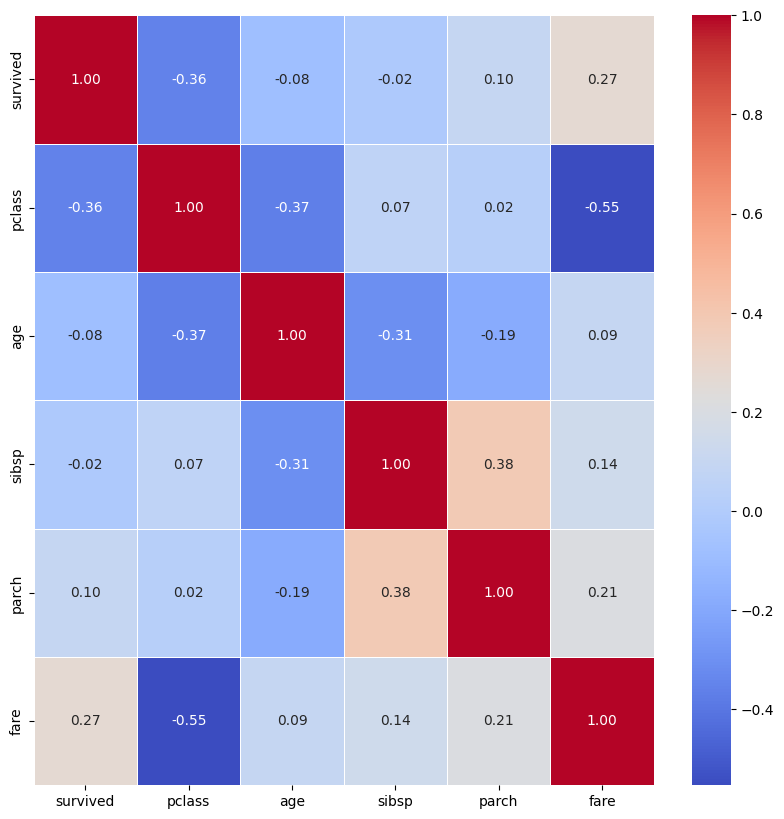

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.select_dtypes(exclude=['object','category','bool']).corr(),annot=True,cmap='coolwarm', fmt=".2f", linewidths=.5)

In [ ]:
encoder=OneHotEncoder()
categoricol_columns=df.select_dtypes(include=['object','category','bool']).columns.tolist()
encoded_data=encoder.fit_transform(df[categoricol_columns])
onehot_df=pd.DataFrame(encoded_data.toarray(),columns=encoder.get_feature_names_out(categoricol_columns))
df=pd.concat([df,onehot_df],axis=1)
df.drop(categoricol_columns,axis=1,inplace=True)

In [ ]:
print(df.corr)

<bound method DataFrame.corr of      survived  pclass   age  sibsp  parch     fare  sex_female  sex_male  \
0         0.0     3.0  22.0    1.0    0.0   7.2500         0.0       1.0   
1         1.0     1.0  38.0    1.0    0.0  71.2833         1.0       0.0   
2         1.0     3.0  26.0    0.0    0.0   7.9250         1.0       0.0   
3         1.0     1.0  35.0    1.0    0.0  53.1000         1.0       0.0   
4         0.0     3.0  35.0    0.0    0.0   8.0500         0.0       1.0   
..        ...     ...   ...    ...    ...      ...         ...       ...   
680       NaN     NaN   NaN    NaN    NaN      NaN         1.0       0.0   
692       NaN     NaN   NaN    NaN    NaN      NaN         0.0       1.0   
697       NaN     NaN   NaN    NaN    NaN      NaN         1.0       0.0   
709       NaN     NaN   NaN    NaN    NaN      NaN         1.0       0.0   
711       NaN     NaN   NaN    NaN    NaN      NaN         0.0       1.0   

     embarked_C  embarked_Q  ...  who_woman  adult_male

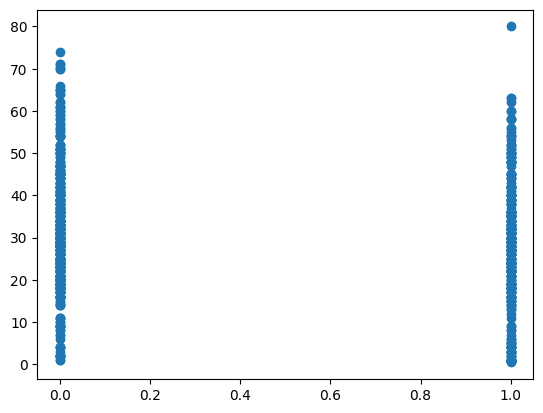

In [ ]:
plt.scatter(df['survived'],df['age'])

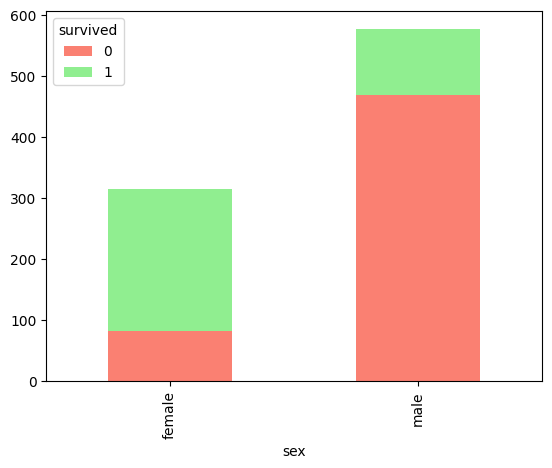

In [ ]:
table.plot(kind='bar', stacked=True, color=['salmon', 'lightgreen'])
plt.show()

<Axes: >

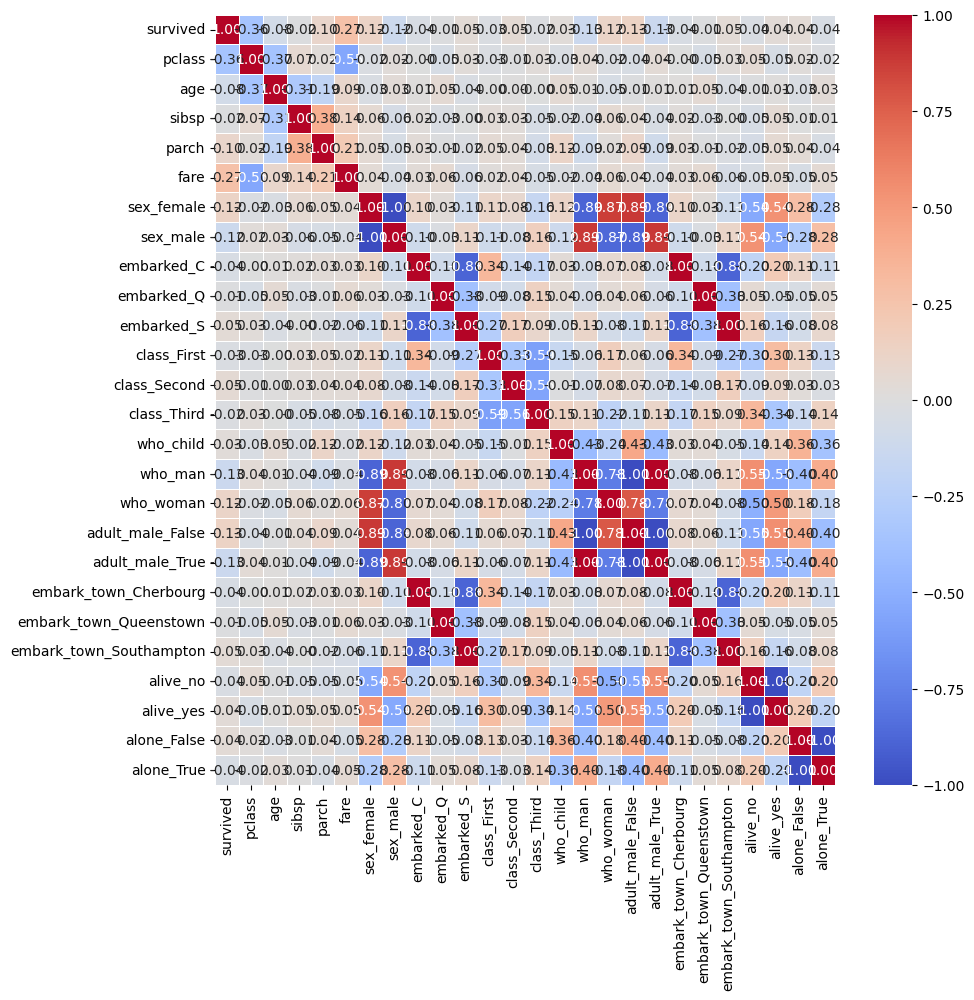

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm', fmt=".2f", linewidths=.5)

In [ ]:
!apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono
  fonts-texgyre fonts-urw-base35 libapache-pom-java libcommons-logging-java
  libcommons-parent-java libfontbox-java libgs9 libgs9-common libidn12
  libijs-0.35 libjbig2dec0 libkpathsea6 libpdfbox-java libptexenc1 libruby3.0
  libsynctex2 libteckit0 libtexlua53 libtexluajit2 libwoff1 libzzip-0-13
  lmodern poppler-data preview-latex-style rake ruby ruby-net-telnet
  ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0 rubygems-integration t1utils
  teckit tex-common tex-gyre texlive-base texlive-binaries texlive-latex-base
  texlive-latex-extra texlive-latex-recommended texlive-pictures tipa
  xfonts-encodings xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf libavalon-framework-java
  libcommons-logging-java-doc libexcalibur-logkit-java 

In [ ]:
!jupyter nbconvert --to pdf ds_lab1.ipynb

[NbConvertApp] Converting notebook ds_lab1.ipynb to pdf
[NbConvertApp] Support files will be in ds_lab1_files/
[NbConvertApp] Making directory ./ds_lab1_files
[NbConvertApp] Writing 55924 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 429632 bytes to ds_lab1.pdf


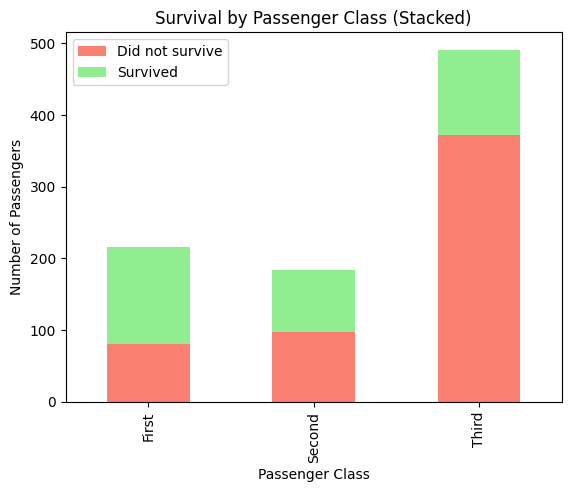

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
survival_counts = pd.crosstab(df['class'], df['survived'])
survival_counts.plot(kind='bar', stacked=True, color=['salmon', 'lightgreen'])
plt.xlabel("Passenger Class")
plt.ylabel("Number of Passengers")
plt.title("Survival by Passenger Class (Stacked)")
plt.legend(["Did not survive", "Survived"])
plt.show()